In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import RandomizedSearchCV

np.set_printoptions(suppress=True) # Suppress scientific notation where possible

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [2]:
# to open pickled data

with open("MVP_patientlevel_intubation.pkl", 'rb') as picklefile: 
    patients = pickle.load(picklefile)

patients.head()

id  Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
0  35483   50               0          1         0           0         0   
1   7062   25               1          0         0           0         0   
2  13779   29               1          0         0           0         0   
3  17334   30               0          0         0           0         0   
4   2789   64               0          0         0           0         1   

   COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
0                  0       0                 0             0            0   
1                  0       0                 0             0            0   
2                  0       0                 0             0            0   
3                  0       0                 0             0            0   
4                  0       0                 0             1            0   

   Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  Intensive_Care  \
0                       0      0                            0               0   
1                       0      1                            0               0   
2                       0      0                            0               0   
3                       0      0                            0               0   
4                       0      1                            0               0   

   Intubation  
0           0  
1           0  
2           0  
3           0  
4           0

In [3]:
patients.columns

Index(['id', 'Age', 'Patient_Gender', 'Pneumonia', 'Pregnant', 'Indigenous',
       'Diabetic', 'COPD_Lung_Disease', 'Asthma', 'Immunosuppressed',
       'Hypertension', 'Comorbidity', 'Cardiovascular_Disease', 'Obese',
       'Chronic_Renal_Insufficiency', 'Intensive_Care', 'Intubation'],
      dtype='object')

In [4]:
patients = patients[['id', 'Age', 'Patient_Gender', 'Pneumonia', 'Pregnant', 'Indigenous',
       'Diabetic', 'COPD_Lung_Disease', 'Asthma', 'Immunosuppressed',
       'Hypertension', 'Comorbidity', 'Cardiovascular_Disease', 'Obese',
       'Chronic_Renal_Insufficiency', 'Intensive_Care', 'Intubation']]

In [5]:
patients.head()

id  Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
0  35483   50               0          1         0           0         0   
1   7062   25               1          0         0           0         0   
2  13779   29               1          0         0           0         0   
3  17334   30               0          0         0           0         0   
4   2789   64               0          0         0           0         1   

   COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
0                  0       0                 0             0            0   
1                  0       0                 0             0            0   
2                  0       0                 0             0            0   
3                  0       0                 0             0            0   
4                  0       0                 0             1            0   

   Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  Intensive_Care  \
0                       0      0                            0               0   
1                       0      1                            0               0   
2                       0      0                            0               0   
3                       0      0                            0               0   
4                       0      1                            0               0   

   Intubation  
0           0  
1           0  
2           0  
3           0  
4           0

In [6]:
patients.shape

(98820, 17)

Train test split before building baseline models

In [7]:
X_train, X_test, label_train, label_test = train_test_split(patients.iloc[:, 1:-1], patients['Intubation'], \
                                                            test_size=0.3, random_state=41)

Scale continuous variables in training set and testing set separately

In [8]:
scaler = MinMaxScaler()
X_train["Age"] = scaler.fit_transform(X_train["Age"].values.astype(float).reshape(-1,1))

In [9]:
X_train.head()

Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
1238   0.191667               1          0         0           0         0   
23203  0.300000               1          0         0           0         1   
18578  0.200000               0          0         0           0         0   
59090  0.416667               0          0         0           0         1   
25536  0.583333               0          1         0           0         0   

       COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
1238                   0       0                 0             0            0   
23203                  0       0                 0             0            0   
18578                  0       0                 0             0            0   
59090                  0       0                 1             1            0   
25536                  0       0                 0             0            0   

       Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  \
1238                        0      0                            0   
23203                       0      0                            0   
18578                       0      0                            0   
59090                       0      0                            0   
25536                       0      0                            0   

       Intensive_Care  
1238                0  
23203               0  
18578               0  
59090               0  
25536               0

In [10]:
scaler = MinMaxScaler()
X_test["Age"] = scaler.fit_transform(X_test["Age"].values.astype(float).reshape(-1,1))

In [11]:
X_test.head()

Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
81905  0.380531               0          0         0           0         0   
27315  0.619469               0          1         0           0         0   
94552  0.318584               1          0         0           0         0   
46146  0.495575               0          0         0           0         0   
33100  0.433628               0          1         0           0         0   

       COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
81905                  1       0                 0             0            0   
27315                  0       0                 0             0            0   
94552                  0       0                 0             0            0   
46146                  0       0                 0             1            0   
33100                  0       0                 0             0            0   

       Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  \
81905                       0      1                            0   
27315                       0      0                            0   
94552                       0      0                            0   
46146                       0      1                            0   
33100                       0      1                            0   

       Intensive_Care  
81905               0  
27315               0  
94552               0  
46146               0  
33100               0

Build baseline model using KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, label_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, label_test)))

The score for kNN is
Training:  98.23%
Test set:  97.77%


In [13]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, label_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, label_test)))

The score for logistic regression is
Training:  97.96%
Test set:  97.88%



Unlike kNN, the logistic regression model has a probabiltiy method built into it. Let's look at the predicted probabilities for the first few observations.

In [14]:
X_test[:5]

Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
81905  0.380531               0          0         0           0         0   
27315  0.619469               0          1         0           0         0   
94552  0.318584               1          0         0           0         0   
46146  0.495575               0          0         0           0         0   
33100  0.433628               0          1         0           0         0   

       COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
81905                  1       0                 0             0            0   
27315                  0       0                 0             0            0   
94552                  0       0                 0             0            0   
46146                  0       0                 0             1            0   
33100                  0       0                 0             0            0   

       Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  \
81905                       0      1                            0   
27315                       0      0                            0   
94552                       0      0                            0   
46146                       0      1                            0   
33100                       0      1                            0   

       Intensive_Care  
81905               0  
27315               0  
94552               0  
46146               0  
33100               0


Let's look at the type of errors that these two classifiers made:

In [15]:
print("kNN confusion matrix: \n\n", confusion_matrix(label_test, knn.predict(X_test)))

kNN confusion matrix: 

 [[28853   140]
 [  520   133]]


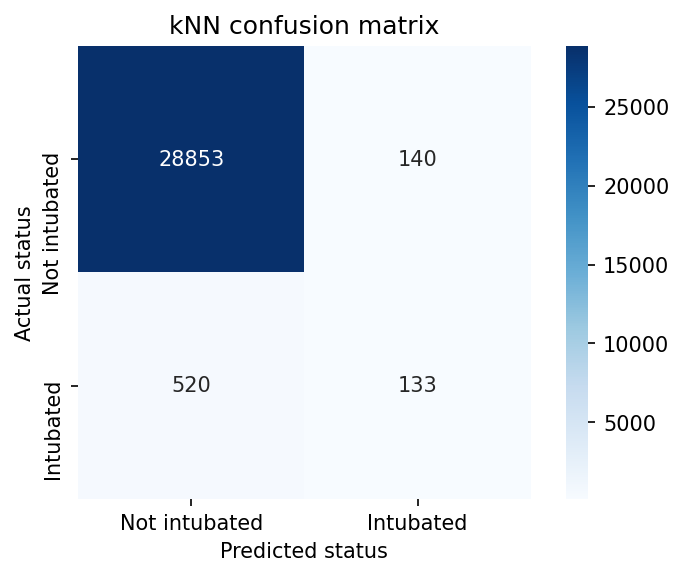

In [16]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(label_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt=".0f",
           xticklabels=["Not intubated", "Intubated"],
           yticklabels=["Not intubated", "Intubated"])

plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('kNN confusion matrix');

kNN Confusion Matrix interpretation:
* Correctly predicted Not Intubated (True Negatives) = 28853
* Incorrectly predicted Not Intubated (False Negatives) = 520
* Incorrectly predicted Intubated (False Positives) = 140
* Correctly predicted Intubated (True Positives) = 133

In [17]:
# using classification_report metric on kNN
from sklearn.metrics import classification_report
y_true = label_test
y_pred = knn.predict(X_test)
target_names = ['Not Intubated', 'Intubated']
print(classification_report(y_true, y_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Intubated       0.98      1.00      0.99     28993
    Intubated       0.49      0.20      0.29       653

     accuracy                           0.98     29646
    macro avg       0.73      0.60      0.64     29646
 weighted avg       0.97      0.98      0.97     29646



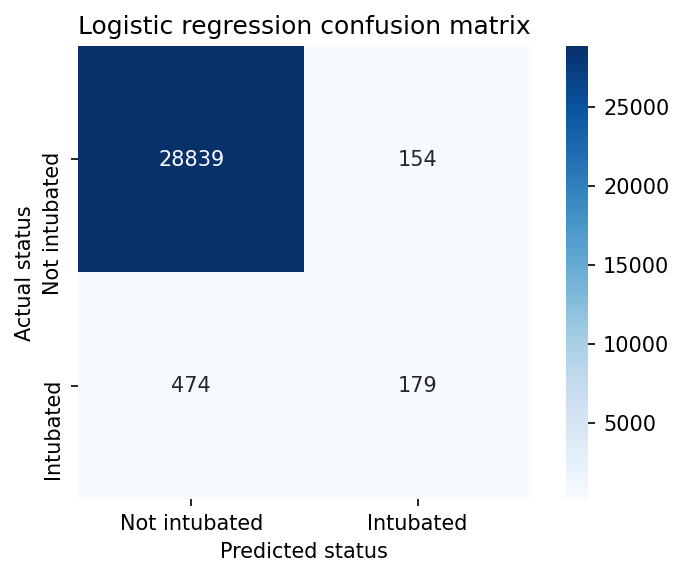

In [18]:
# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(label_test, logit.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt=".0f",
           xticklabels=["Not intubated", "Intubated"],
           yticklabels=["Not intubated", "Intubated"])

plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logit_baseline")

logit Confusion Matrix interpretation:
* Correctly predicted Not Intubated (True Negatives) = 28839
* Incorrectly predicted Not Intubated (False Negatives) = 474
* Incorrectly predicted Intubated (False Positives) = 154
* Correctly predicted Intubated (True Positives) = 179

In [19]:
# using classification_report metric on logit
from sklearn.metrics import classification_report
y_true = label_test
y_pred = logit.predict(X_test)
target_names = ['Not Intubated', 'Intubated']
print(classification_report(y_true, y_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Intubated       0.98      0.99      0.99     28993
    Intubated       0.54      0.27      0.36       653

     accuracy                           0.98     29646
    macro avg       0.76      0.63      0.68     29646
 weighted avg       0.97      0.98      0.98     29646



Examine distribution of intubated to not intubated cases and understand why accuracy is not a useful metric in our case

In [20]:
patients.Intubation.value_counts()

0    96726
1     2094
Name: Intubation, dtype: int64

In [21]:
96726/(96726 + 2094)

0.9788099574984821

Highly imbalanced. If we always predict Not Intubated, we will be right 96726/(96726 + 2094) = 97.88% of the time!

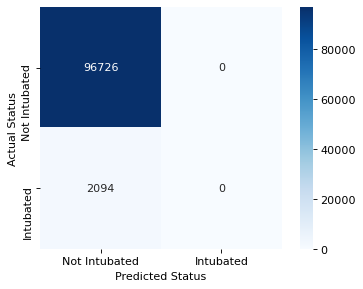

In [22]:
predictions = [0]*len(patients) # predict everything as class 0!

patients_confusion = confusion_matrix(patients.Intubation, predictions)
plt.figure(dpi=80)
sns.heatmap(patients_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Intubated', 'Intubated'],
           yticklabels=['Not Intubated', 'Intubated']);
plt.xlabel('Predicted Status')
plt.ylabel('Actual Status');

Let's make a slightly better model using logistic regression since it scored better than kNN above. Must take into account class imbalance and use case, shoot for better recall

In [23]:
lm = LogisticRegression(C = 100)
lm.fit(X_train, label_train)
print("Logistic score: {:6.4f}".format(lm.score(X_train,label_train)))

Logistic score: 0.9796


In [24]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict Intubated if probability of being Intubated is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    patients_confusion = confusion_matrix(label_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(patients_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Intubated', 'Intubated'],
           yticklabels=['Not Intubated', 'Intubated']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    
    # print classification report 
    target_names = ['Not Intubated', 'Intubated']
    print(classification_report(label_test, y_predict, target_names=target_names))

               precision    recall  f1-score   support

Not Intubated       0.98      0.99      0.99     28993
    Intubated       0.53      0.28      0.37       653

     accuracy                           0.98     29646
    macro avg       0.76      0.64      0.68     29646
 weighted avg       0.97      0.98      0.98     29646



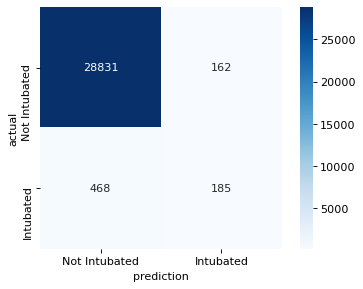

In [25]:
make_confusion_matrix(lm)

In [26]:
xgb = XGBClassifier()
xgb.fit(X_train, label_train)
print("xgBoost score: {:6.4f}".format(xgb.score(X_train,label_train)))

[13:27:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


xgBoost score: 0.9831


               precision    recall  f1-score   support

Not Intubated       0.98      1.00      0.99     28993
    Intubated       0.49      0.20      0.29       653

     accuracy                           0.98     29646
    macro avg       0.74      0.60      0.64     29646
 weighted avg       0.97      0.98      0.97     29646



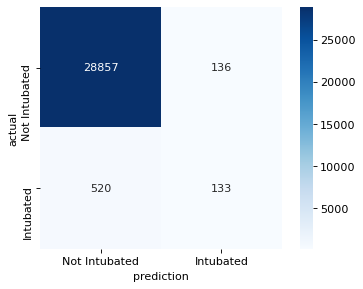

In [27]:
make_confusion_matrix(xgb)

In [28]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(lm, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

Interpreting changing threshold in confusion matrix: In our case, we want to minimize the number of False Negatives (those we predicted as Not Needing Intubated but who actually were Intubated). In other words, we want to increase our Recall to be more balanced with our Precision. By reducing our probability threshold to 6% before we label a patient as needing Intubation, we correctly identified more patients who needed Intubation (increased Recall: 360 vs 185 at 50% threshold), but we also predicted significantly more patients would need Intubation who didn't (lowered Precision: 1056 vs 162 at 50% threshold).

Precision-Recall Tradeoff: decreasing the threshold increases recall but decreases precision. Which is worse in our case? There are costs associated with incorrectly predicting whether someone will need a ventilator (low recall = shortage of ventilators, lack of patient care, lack of resources, more deaths?) and over predicting the number of ventilators needed (wasted resources, significantly higher costs for hospital or care provider, taking ventilators from limited supply)

In [29]:
# using the default threshold of 0.5, which is what vanilla predict does
label_predict = lm.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_test, label_predict), 
                                                     recall_score(label_test, label_predict)))

Default threshold:
Precision: 0.5331,   Recall: 0.2833


In [30]:
# using the new threshold of 0.06
label_predict = (lm.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_test, label_predict), 
                                                     recall_score(label_test, label_predict)))

Threshold of 0.06:
Precision: 0.2542,   Recall: 0.5513


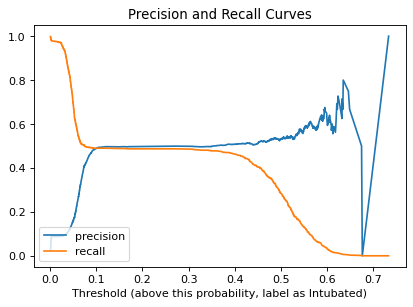

In [31]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
from sklearn.metrics import precision_recall_curve

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_test, lm.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as Intubated)');
plt.title('Precision and Recall Curves');

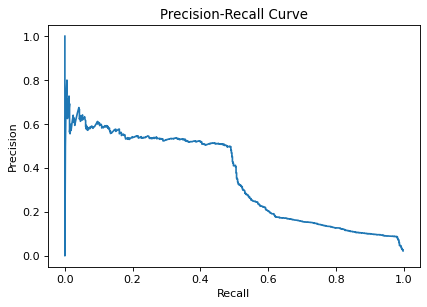

In [32]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

Look at f1 score to find right balance between precision and recall

In [33]:
from sklearn.metrics import f1_score

# Or we can just ask sklearn
label_predict = lm.predict(X_test)
f1_score(label_test, label_predict)

0.37000000000000005

In [34]:
# What about the threshold of 0.06?
label_predict = (lm.predict_proba(X_test)[:, 1] > 0.06)
f1_score(label_test, label_predict)

0.34799420009666504

The ROC Curve

In [35]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(label_test, lm.predict_proba(X_test)[:,1])

ROC AUC score =  0.9347553079427897


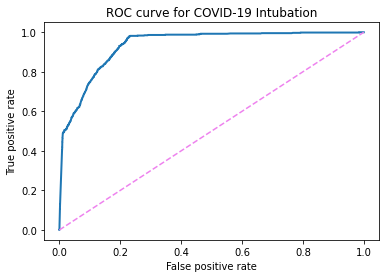

In [36]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for COVID-19 Intubation');
print("ROC AUC score = ", roc_auc_score(label_test, lm.predict_proba(X_test)[:,1]))
plt.savefig("ROC_logit_baseline")

In [37]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(label_test, lm.predict_proba(X_test))))

Log-loss on logit: 0.0622


In [38]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
dc.fit(X_train, label_train)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(label_test, dc.predict_proba(X_test))))

Log-loss on dummy classifier: 0.1059


In [39]:
print("Logistic accuracy: {:6.4f}".format(lm.score(X_test, label_test)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_test, label_test)))

Logistic accuracy: 0.9787
Dummy accuracy: 0.9780


Examining other models

In [40]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(label_test, xgb.predict_proba(X_test)[:,1])

ROC AUC score =  0.9317277513624903


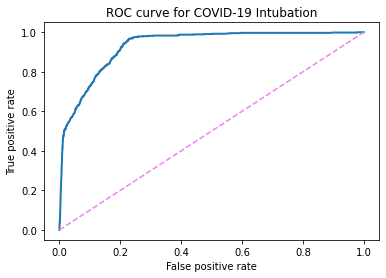

In [41]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for COVID-19 Intubation');
print("ROC AUC score = ", roc_auc_score(label_test, xgb.predict_proba(X_test)[:,1]))
plt.savefig("ROC_xgb_baseline")

Handling target imbalance

In [42]:
patients.shape

(98820, 17)

In [43]:
patients.head()

id  Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
0  35483   50               0          1         0           0         0   
1   7062   25               1          0         0           0         0   
2  13779   29               1          0         0           0         0   
3  17334   30               0          0         0           0         0   
4   2789   64               0          0         0           0         1   

   COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
0                  0       0                 0             0            0   
1                  0       0                 0             0            0   
2                  0       0                 0             0            0   
3                  0       0                 0             0            0   
4                  0       0                 0             1            0   

   Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  Intensive_Care  \
0                       0      0                            0               0   
1                       0      1                            0               0   
2                       0      0                            0               0   
3                       0      0                            0               0   
4                       0      1                            0               0   

   Intubation  
0           0  
1           0  
2           0  
3           0  
4           0

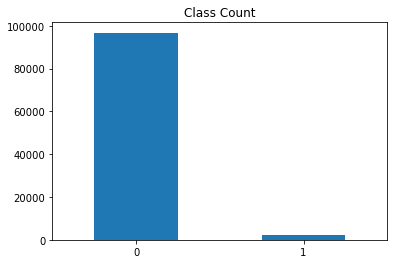

In [44]:
patients.Intubation.value_counts().plot(kind='bar', title='Class Count', rot=0);

In [3]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.498  
1                         0.5            64.83                    0.498  
2                         0.5            64.83                    0.498  
3                         0.5            64.83                    0.498  
4                         0.5            64.83                    0.498  

[5 rows x 59 columns]

In [4]:
df = df.loc[df.location=='Mexico']

In [5]:
df.shape

(404, 59)

In [6]:
df.head()

iso_code      continent location        date  total_cases  new_cases  \
39008      MEX  North America   Mexico  2020-01-01          NaN        NaN   
39009      MEX  North America   Mexico  2020-01-02          NaN        NaN   
39010      MEX  North America   Mexico  2020-01-03          NaN        NaN   
39011      MEX  North America   Mexico  2020-01-04          NaN        NaN   
39012      MEX  North America   Mexico  2020-01-05          NaN        NaN   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
39008                 NaN           NaN         NaN                  NaN  ...   
39009                 NaN           NaN         NaN                  NaN  ...   
39010                 NaN           NaN         NaN                  NaN  ...   
39011                 NaN           NaN         NaN                  NaN  ...   
39012                 NaN           NaN         NaN                  NaN  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
39008       17336.469              2.5                152.783   
39009       17336.469              2.5                152.783   
39010       17336.469              2.5                152.783   
39011       17336.469              2.5                152.783   
39012       17336.469              2.5                152.783   

       diabetes_prevalence  female_smokers  male_smokers  \
39008                13.06             6.9          21.4   
39009                13.06             6.9          21.4   
39010                13.06             6.9          21.4   
39011                13.06             6.9          21.4   
39012                13.06             6.9          21.4   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
39008                  87.847                        1.38            75.05   
39009                  87.847                        1.38            75.05   
39010                  87.847                        1.38            75.05   
39011                  87.847                        1.38            75.05   
39012                  87.847                        1.38            75.05   

       human_development_index  
39008                    0.774  
39009                    0.774  
39010                    0.774  
39011                    0.774  
39012                    0.774  

[5 rows x 59 columns]

In [7]:
df = df.loc[df.date < '2020-07-09']

In [8]:
df.shape

(190, 59)

In [9]:
df = df.reset_index(drop=True)
df.head()

iso_code      continent location        date  total_cases  new_cases  \
0      MEX  North America   Mexico  2020-01-01          NaN        NaN   
1      MEX  North America   Mexico  2020-01-02          NaN        NaN   
2      MEX  North America   Mexico  2020-01-03          NaN        NaN   
3      MEX  North America   Mexico  2020-01-04          NaN        NaN   
4      MEX  North America   Mexico  2020-01-05          NaN        NaN   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0       17336.469              2.5                152.783   
1       17336.469              2.5                152.783   
2       17336.469              2.5                152.783   
3       17336.469              2.5                152.783   
4       17336.469              2.5                152.783   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                13.06             6.9          21.4                  87.847   
1                13.06             6.9          21.4                  87.847   
2                13.06             6.9          21.4                  87.847   
3                13.06             6.9          21.4                  87.847   
4                13.06             6.9          21.4                  87.847   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                        1.38            75.05                    0.774  
1                        1.38            75.05                    0.774  
2                        1.38            75.05                    0.774  
3                        1.38            75.05                    0.774  
4                        1.38            75.05                    0.774  

[5 rows x 59 columns]

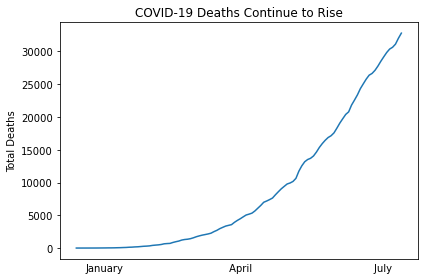

In [48]:
s = sns.lineplot(x=df.date, y=df.total_deaths).set_title('COVID-19 Deaths Continue to Rise')
plt.ylabel('Total Deaths')
plt.xlabel('January                                  April                                       July')
plt.xticks([])
plt.tight_layout()
plt.show()

In [11]:
df2 = df.loc[df.date > '2020-06-01']

<AxesSubplot:xlabel='date', ylabel='total_deaths'>

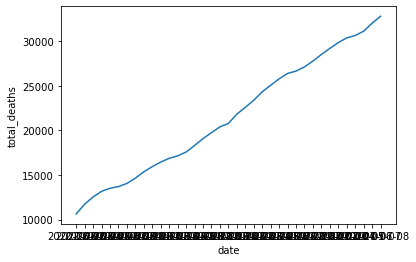

In [12]:
sns.lineplot(x=df2.date, y=df2.total_deaths)

*to be continued in Handling Class Imbalance notebook*